# Introduction to flarestack.cosmo functions

Flarestack includes several functions related to cosmology, which are useful for neutrino studies but not directly related to IceCube data analysis. 

## IceCube Measurements of the Diffuse Neutrino Flux

It is often useful to compare quantities that may be derived with flarestack to measurements of the diffuse flux of astrophysical neutrinos measured by IceCube. There have been several measurements of this flux, each providing a best fit spectral index and flux normalisation, alongside contours representing the fit ranges for these parameters.

The following contours are currently implemented in flarestack:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from flarestack.cosmo import get_diffuse_flux_contour, contours, get_diffuse_flux_at_100TeV
import logging
logging.getLogger().setLevel("INFO")

In [5]:
for fit in contours.keys():
    best_fit, best_gamma = get_diffuse_flux_at_100TeV(fit)
    logging.info(f"Best fit is {best_fit:.2g} at 100 TeV, with spectral index {best_gamma:.2f}")

INFO:root:Loaded contour joint_15 from https://arxiv.org/abs/1507.03991
INFO:root:Best fit is 2.2e-18 1 / (cm2 GeV s sr) at 100 TeV, with spectral index 2.50
INFO:root:Loaded contour northern_tracks_16 from https://arxiv.org/abs/1607.08006
INFO:root:Best fit is 9e-19 1 / (cm2 GeV s sr) at 100 TeV, with spectral index 2.13
INFO:root:Loaded contour northern_tracks_17 from https://doi.org/10.22323/1.301.1005
INFO:root:Best fit is 1e-18 1 / (cm2 GeV s sr) at 100 TeV, with spectral index 2.19
INFO:root:Loaded contour northern_tracks_19 from https://arxiv.org/abs/1908.09551
INFO:root:Best fit is 1.4e-18 1 / (cm2 GeV s sr) at 100 TeV, with spectral index 2.28


INFO:root:Loaded contour joint_15 from https://arxiv.org/abs/1507.03991
INFO:root:Loaded contour northern_tracks_16 from https://arxiv.org/abs/1607.08006
INFO:root:Loaded contour northern_tracks_17 from https://doi.org/10.22323/1.301.1005
INFO:root:Loaded contour northern_tracks_19 from https://arxiv.org/abs/1908.09551


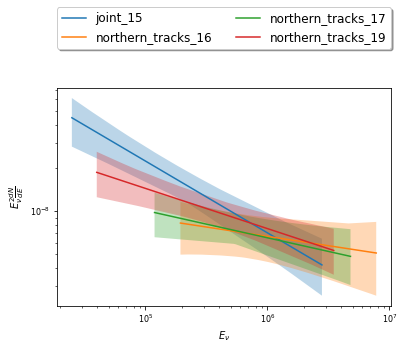

In [6]:
plt.figure()
ax = plt.subplot(111)

for fit in contours.keys():

    best_fit, upper_butterfly, lower_butterfly, e_range = get_diffuse_flux_contour(fit)

    plt.plot(e_range, best_fit(e_range) * e_range**2, label=fit)

    plt.fill_between(e_range, upper_butterfly(e_range)* e_range**2, lower_butterfly(e_range)* e_range**2, alpha=0.3)

plt.yscale("log")
plt.xscale("log")
plt.xlabel(r"$E_{\nu}$")
plt.ylabel(r"$E_{\nu}^{2} \frac{dN}{dE}$")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),
          ncol=2, fancybox=True, shadow=True, fontsize=12)